In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pickle
import pathlib
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

import sys
try:
    sys.path.append('/media/nahuel-ofi/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings_v3 import *
except:
    sys.path.append('/media/nahuel/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings_v3 import *
    
    
fig_dir = '../figs'

In [2]:
net_dir_name = '../networks/ER'

N_values = [125, 250, 500, 1000, 2000, 4000, 8000]
p_values = [0.032, 0.016, 0.008, 0.004, 0.002, 0.001, 0.0005]
seeds_by_N = [range(2000), range(2000), range(1000), range(1000), 
              range(685), range(25), [0, 1, 2, 4, 6, 8]]

attacks = ['BtwU', 'DegU', 'Ran']
meassures = ['meanS', 'meanS2', 'binder', 'binder2']
spin_types = [0, 1, 2, 3]

Ngcc_values = {}
Nsec_values = {}
delta2_btw_sum = {}
btw_sum = {}
btw_mean = {}
btw_std = {}
btw_CV = {}
spin_sum = {}
finiteSizeMeassures = {}
for meassure in meassures:
    finiteSizeMeassures[meassure] = {}
spin_sums = {}
spin_vars = {}
for spin_type in spin_types:
    spin_sums[spin_type] = {}
    spin_vars[spin_type] = {}

mean_Ngcc_values = {}
mean_Nsec_values = {}
mean_delta2_btw_sum = {}
mean_btw_sum = {}
mean_btw_mean = {}
mean_btw_std = {}
mean_btw_CV = {}
mean_spin_sum = {}
mean_finiteSizeMeassures = {}
for meassure in meassures:
    mean_finiteSizeMeassures[meassure] = {}
mean_spin_sums = {}
mean_spin_vars = {}    
for spin_type in spin_types:
    mean_spin_sums[spin_type] = {}
    mean_spin_vars[spin_type] = {}
    
for N, p, seeds in zip(N_values, p_values, seeds_by_N):
    print(N)
    Ngcc_values[N] = {}
    Nsec_values[N] = {}
    delta2_btw_sum[N] = {}
    btw_sum[N] = {}
    btw_mean[N] = {}
    btw_std[N] = {}
    btw_CV[N] = {}
    spin_sum[N] = {}
    for meassure in meassures:
        finiteSizeMeassures[meassure][N] = {}
    for spin_type in spin_types:
        spin_sums[spin_type][N] = {}
        spin_vars[spin_type][N] = {}
        
    mean_Ngcc_values[N] = {}
    mean_Nsec_values[N] = {}
    mean_delta2_btw_sum[N] = {}
    mean_btw_sum[N] = {}
    mean_btw_mean[N] = {}
    mean_btw_std[N] = {}
    mean_btw_CV[N] = {}
    mean_spin_sum[N] = {}
    for meassure in meassures:
        mean_finiteSizeMeassures[meassure][N] = {}
    for spin_type in spin_types:
        mean_spin_sums[spin_type][N] = {}
        mean_spin_vars[spin_type][N] = {}

    for attack in attacks:
        
        Ngcc_values[N][attack] = []
        Nsec_values[N][attack] = []
        delta2_btw_sum[N][attack] = []
        btw_sum[N][attack] = []
        btw_mean[N][attack] = []
        btw_std[N][attack] = []
        btw_CV[N][attack] = []
        spin_sum[N][attack] = []
        for meassure in meassures:
            finiteSizeMeassures[meassure][N][attack] = []
        for spin_type in spin_types:
            spin_sums[spin_type][N][attack] = []
            spin_vars[spin_type][N][attack] = []
        
        for seed in seeds:
                       
            network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)
            network_file = network + '.txt'
            full_network_path = os.path.join(net_dir_name, network, network_file)
            
            attack_dir_name = os.path.join(net_dir_name, network, attack)
            
            full_Ngcc_file_name  = os.path.join(attack_dir_name, 'Ngcc_values.txt')
            aux = np.loadtxt(full_Ngcc_file_name, dtype=float)
            _Ngcc_values = aux[:,0]
            _Nsec_values = aux[:,1]
            
            full_deltaBtw_file_name  = os.path.join(attack_dir_name, 'deltaBtw.txt')
            _delta2_btw_sum = np.loadtxt(full_deltaBtw_file_name)
            
            #full_btw_file_name  = os.path.join(attack_dir_name, 'orderParams.txt')
            #_spin_meassures = np.loadtxt(full_btw_file_name)
            
            full_btw_dist_data_name  = os.path.join(attack_dir_name, 'btwDistParameters.txt')
            aux = np.loadtxt(full_btw_dist_data_name)

            _btw_mean = aux[:,0]
            _btw_std = aux[:,1]
            _btw_sum = aux[:,2]
            _btw_CV = _btw_std / _btw_mean
            
            full_finiteSizeMeassures_file_name  = os.path.join(attack_dir_name, 'finiteClusters.txt')
            _finiteSizeMeassures = np.loadtxt(full_finiteSizeMeassures_file_name, dtype=float)
            
            Ngcc_values[N][attack].append(_Ngcc_values)
            Nsec_values[N][attack].append(_Nsec_values)
            delta2_btw_sum[N][attack].append(_delta2_btw_sum)
            btw_mean[N][attack].append(_btw_mean)
            btw_std[N][attack].append(_btw_std)
            btw_CV[N][attack].append(_btw_CV)
            btw_sum[N][attack].append(_btw_sum)
            #spin_sum[N][attack].append(_spin_sum)
            
            finiteSizeMeassures['meanS'][N][attack].append(_finiteSizeMeassures[:,0])
            finiteSizeMeassures['meanS2'][N][attack].append(_finiteSizeMeassures[:,1])
            finiteSizeMeassures['binder'][N][attack].append(_finiteSizeMeassures[:,2])
            finiteSizeMeassures['binder2'][N][attack].append(_finiteSizeMeassures[:,3])
            
            if False:
                spin_sums[0][N][attack].append(_spin_meassures[:,0])
                spin_sums[1][N][attack].append(_spin_meassures[:,2])
                spin_sums[2][N][attack].append(_spin_meassures[:,4])
                spin_sums[3][N][attack].append(_spin_meassures[:,6])

                spin_vars[0][N][attack].append(_spin_meassures[:,1])
                spin_vars[1][N][attack].append(_spin_meassures[:,3])
                spin_vars[2][N][attack].append(_spin_meassures[:,5])
                spin_vars[3][N][attack].append(_spin_meassures[:,7])

        mean_Ngcc_values[N][attack] = np.mean(Ngcc_values[N][attack], axis=0)
        mean_Nsec_values[N][attack] = np.mean(Nsec_values[N][attack], axis=0)
        mean_delta2_btw_sum[N][attack] = np.mean(delta2_btw_sum[N][attack], axis=0)
        mean_btw_mean[N][attack] = np.mean(btw_mean[N][attack], axis=0)
        mean_btw_std[N][attack] = np.mean(btw_std[N][attack], axis=0)
        mean_btw_CV[N][attack] = np.mean(btw_CV[N][attack], axis=0)
        mean_btw_sum[N][attack] = np.mean(btw_sum[N][attack], axis=0)
        #mean_spin_sum[N][attack] = np.mean(spin_sum[N][attack], axis=0)
        for meassure in meassures:
            mean_finiteSizeMeassures[meassure][N][attack] = np.mean(finiteSizeMeassures[meassure][N][attack], axis=0)
            
        if False:    
            for spin_type in spin_types:
                mean_spin_sums[spin_type][N][attack] = np.mean(spin_sums[spin_type][N][attack], axis=0)
                mean_spin_vars[spin_type][N][attack] = np.mean(spin_vars[spin_type][N][attack], axis=0)

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:117: RuntimeWarning: invalid value encountered in true_divide


### Delta betweenness

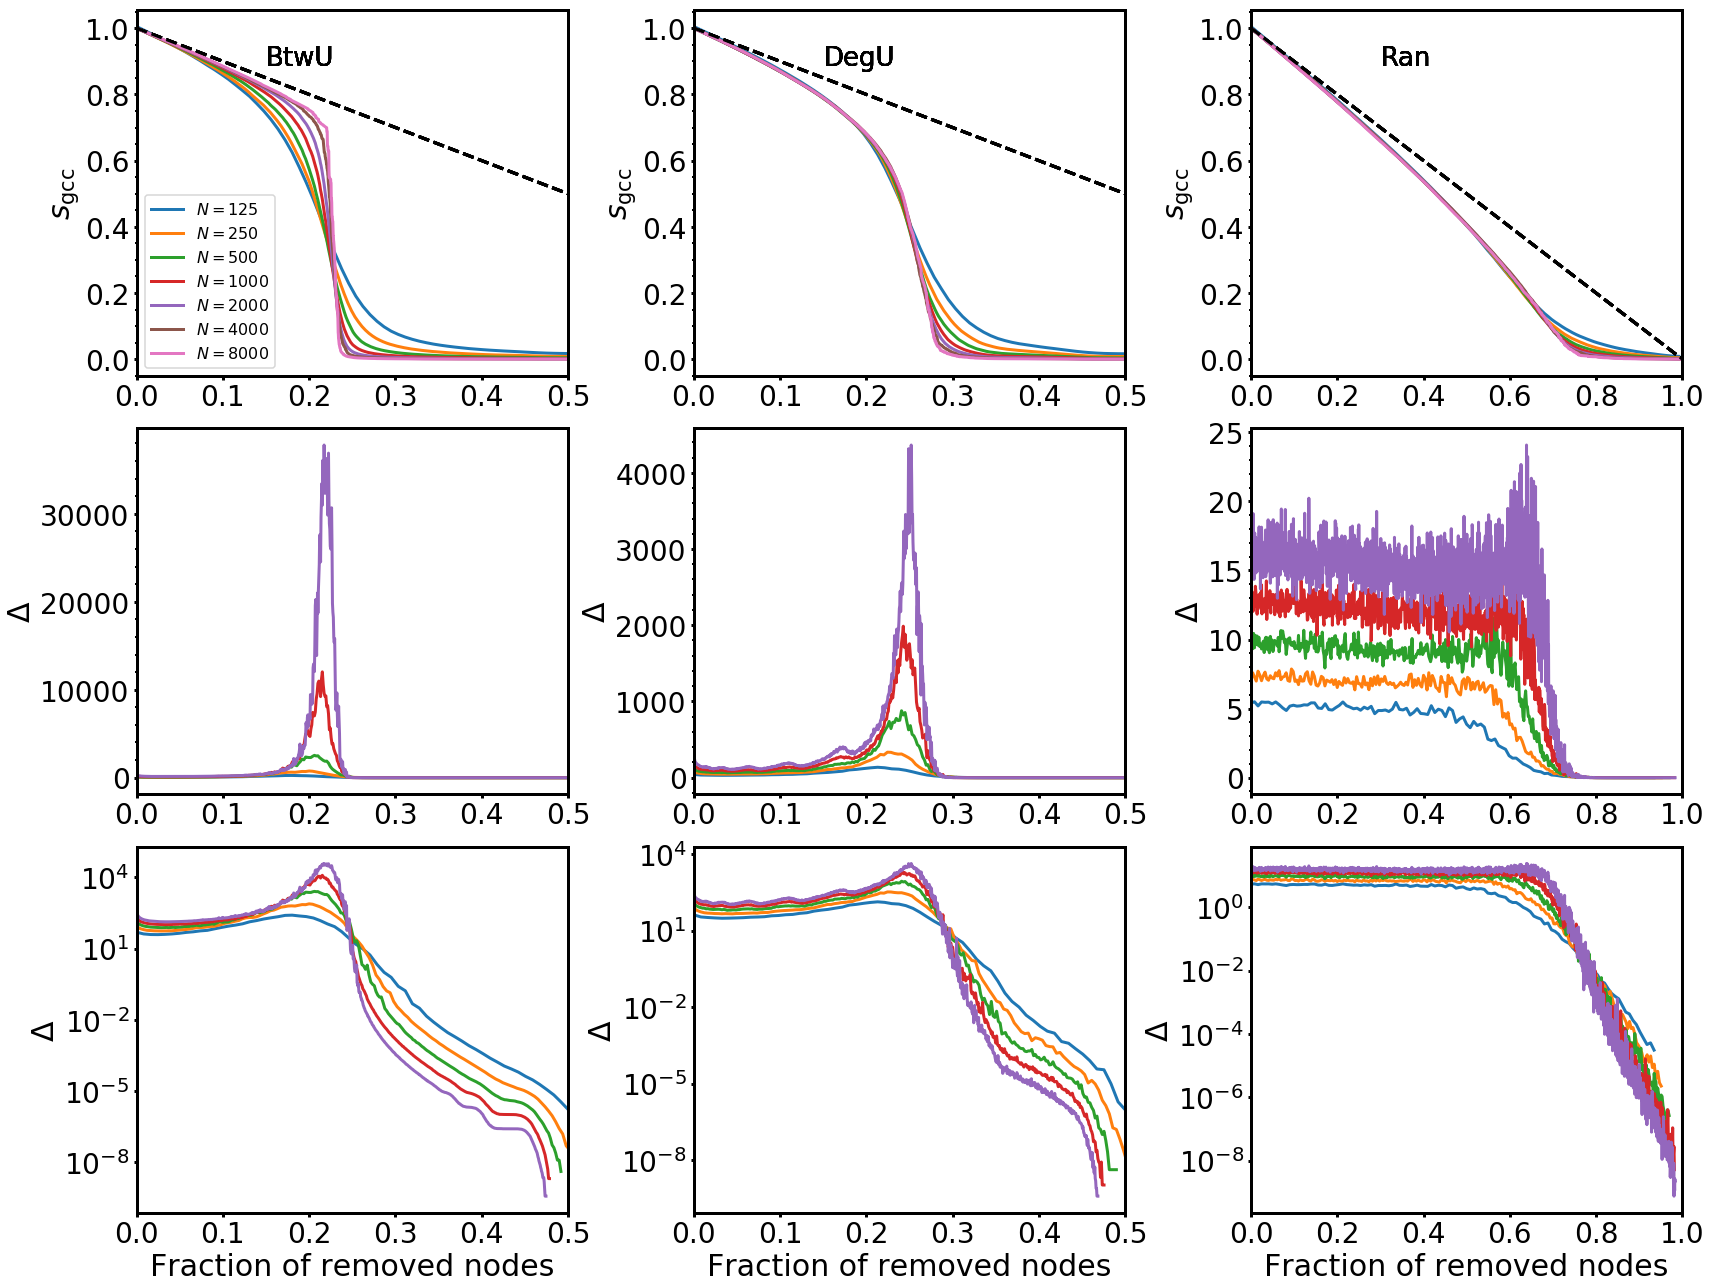

In [11]:
fig, axes = plt.subplots(figsize=(24, 18), ncols=3, nrows=3)

x_lims = [(0, 0.5), (0, 0.5), (0, 1)]

for i, attack in enumerate(attacks):
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        ax = axes[0][i]
        ax.set_ylabel(r'$s_{\mathrm{gcc}}$')
        #ax.set_xlabel('Fraction of removed nodes')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0
        ax.set_xlim(x_lims[i])
        if i == 0:
            ax.plot(X, Y, label=r'$N = $' + '{}'.format(N))
            ax.legend(loc='best', fontsize=16)
        else:
            ax.plot(X, Y)
        line_x = np.arange(0, 1.01, 0.01)
        line_y = 1 - line_x
        ax.plot(line_x, line_y, '--', color='k')
        
        ax.text(0.3, 0.85, attack, transform=ax.transAxes, fontsize=26)
        #ax.set_xlim(0.20, 0.25)
        

        #ax.set_xlim(0.1, 0.3)
                      
        ax = axes[1][i]
        if N > 2000:
            continue
        #ax.set_xlabel('Fraction of removed nodes')
        ax.set_xlabel('')
        
        ax.set_xlim(x_lims[i])
        X2 = np.arange(len(mean_delta2_btw_sum[N][attack])) / Ngcc0
        scaled = False
        if scaled:
            if attack == 'BtwU':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(1.666))
                ax.set_ylabel(r'$\Delta/N^{5/3}$')
            elif attack == 'DegU':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(1.333))
                ax.set_ylabel(r'$\Delta/N^{4/3}$')
            elif attack == 'Ran':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(0.5))
                ax.set_ylabel(r'$\Delta/N^{0.5}$')
        else:
            Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2)
            ax.set_ylabel(r'$\Delta$')
        #Y2 = mean_delta2_btw_sum[N][attack] / (mean_Ngcc_values[N][attack]**2)

        ax.plot(X2, Y2)
        
        ax = axes[2][i]
        if N > 2000:
            continue
        ax.set_xlabel('Fraction of removed nodes')
        
        ax.set_xlim(x_lims[i])
        X2 = np.arange(len(mean_delta2_btw_sum[N][attack])) / Ngcc0
        if scaled:
            if attack == 'BtwU':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(1.666))
                ax.set_ylabel(r'$\Delta/N^{5/3}$')
            elif attack == 'DegU':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(1.333))
                ax.set_ylabel(r'$\Delta/N^{4/3}$')
            elif attack == 'Ran':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(0.5))
                ax.set_ylabel(r'$\Delta/N^{0.5}$')
        else:
            Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2)
            ax.set_ylabel(r'$\Delta$')
        #Y2 = mean_delta2_btw_sum[N][attack] / ((Ngcc0**2)*N**(0))
        #Y2 = mean_delta2_btw_sum[N][attack] / (mean_Ngcc_values[N][attack]**2)
        
        ax.set_yscale('log')
        Y2[Y2==0] = np.NaN
        ax.plot(X2, Y2)
        #ax2.set_ylim(10E-8, 1)

plt.tight_layout()
if scaled:
    fig_base_name = 'Btw_change_ER_scaled'
else:
    fig_base_name = 'Btw_change_ER'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

### Percolation analysis

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in true_divide


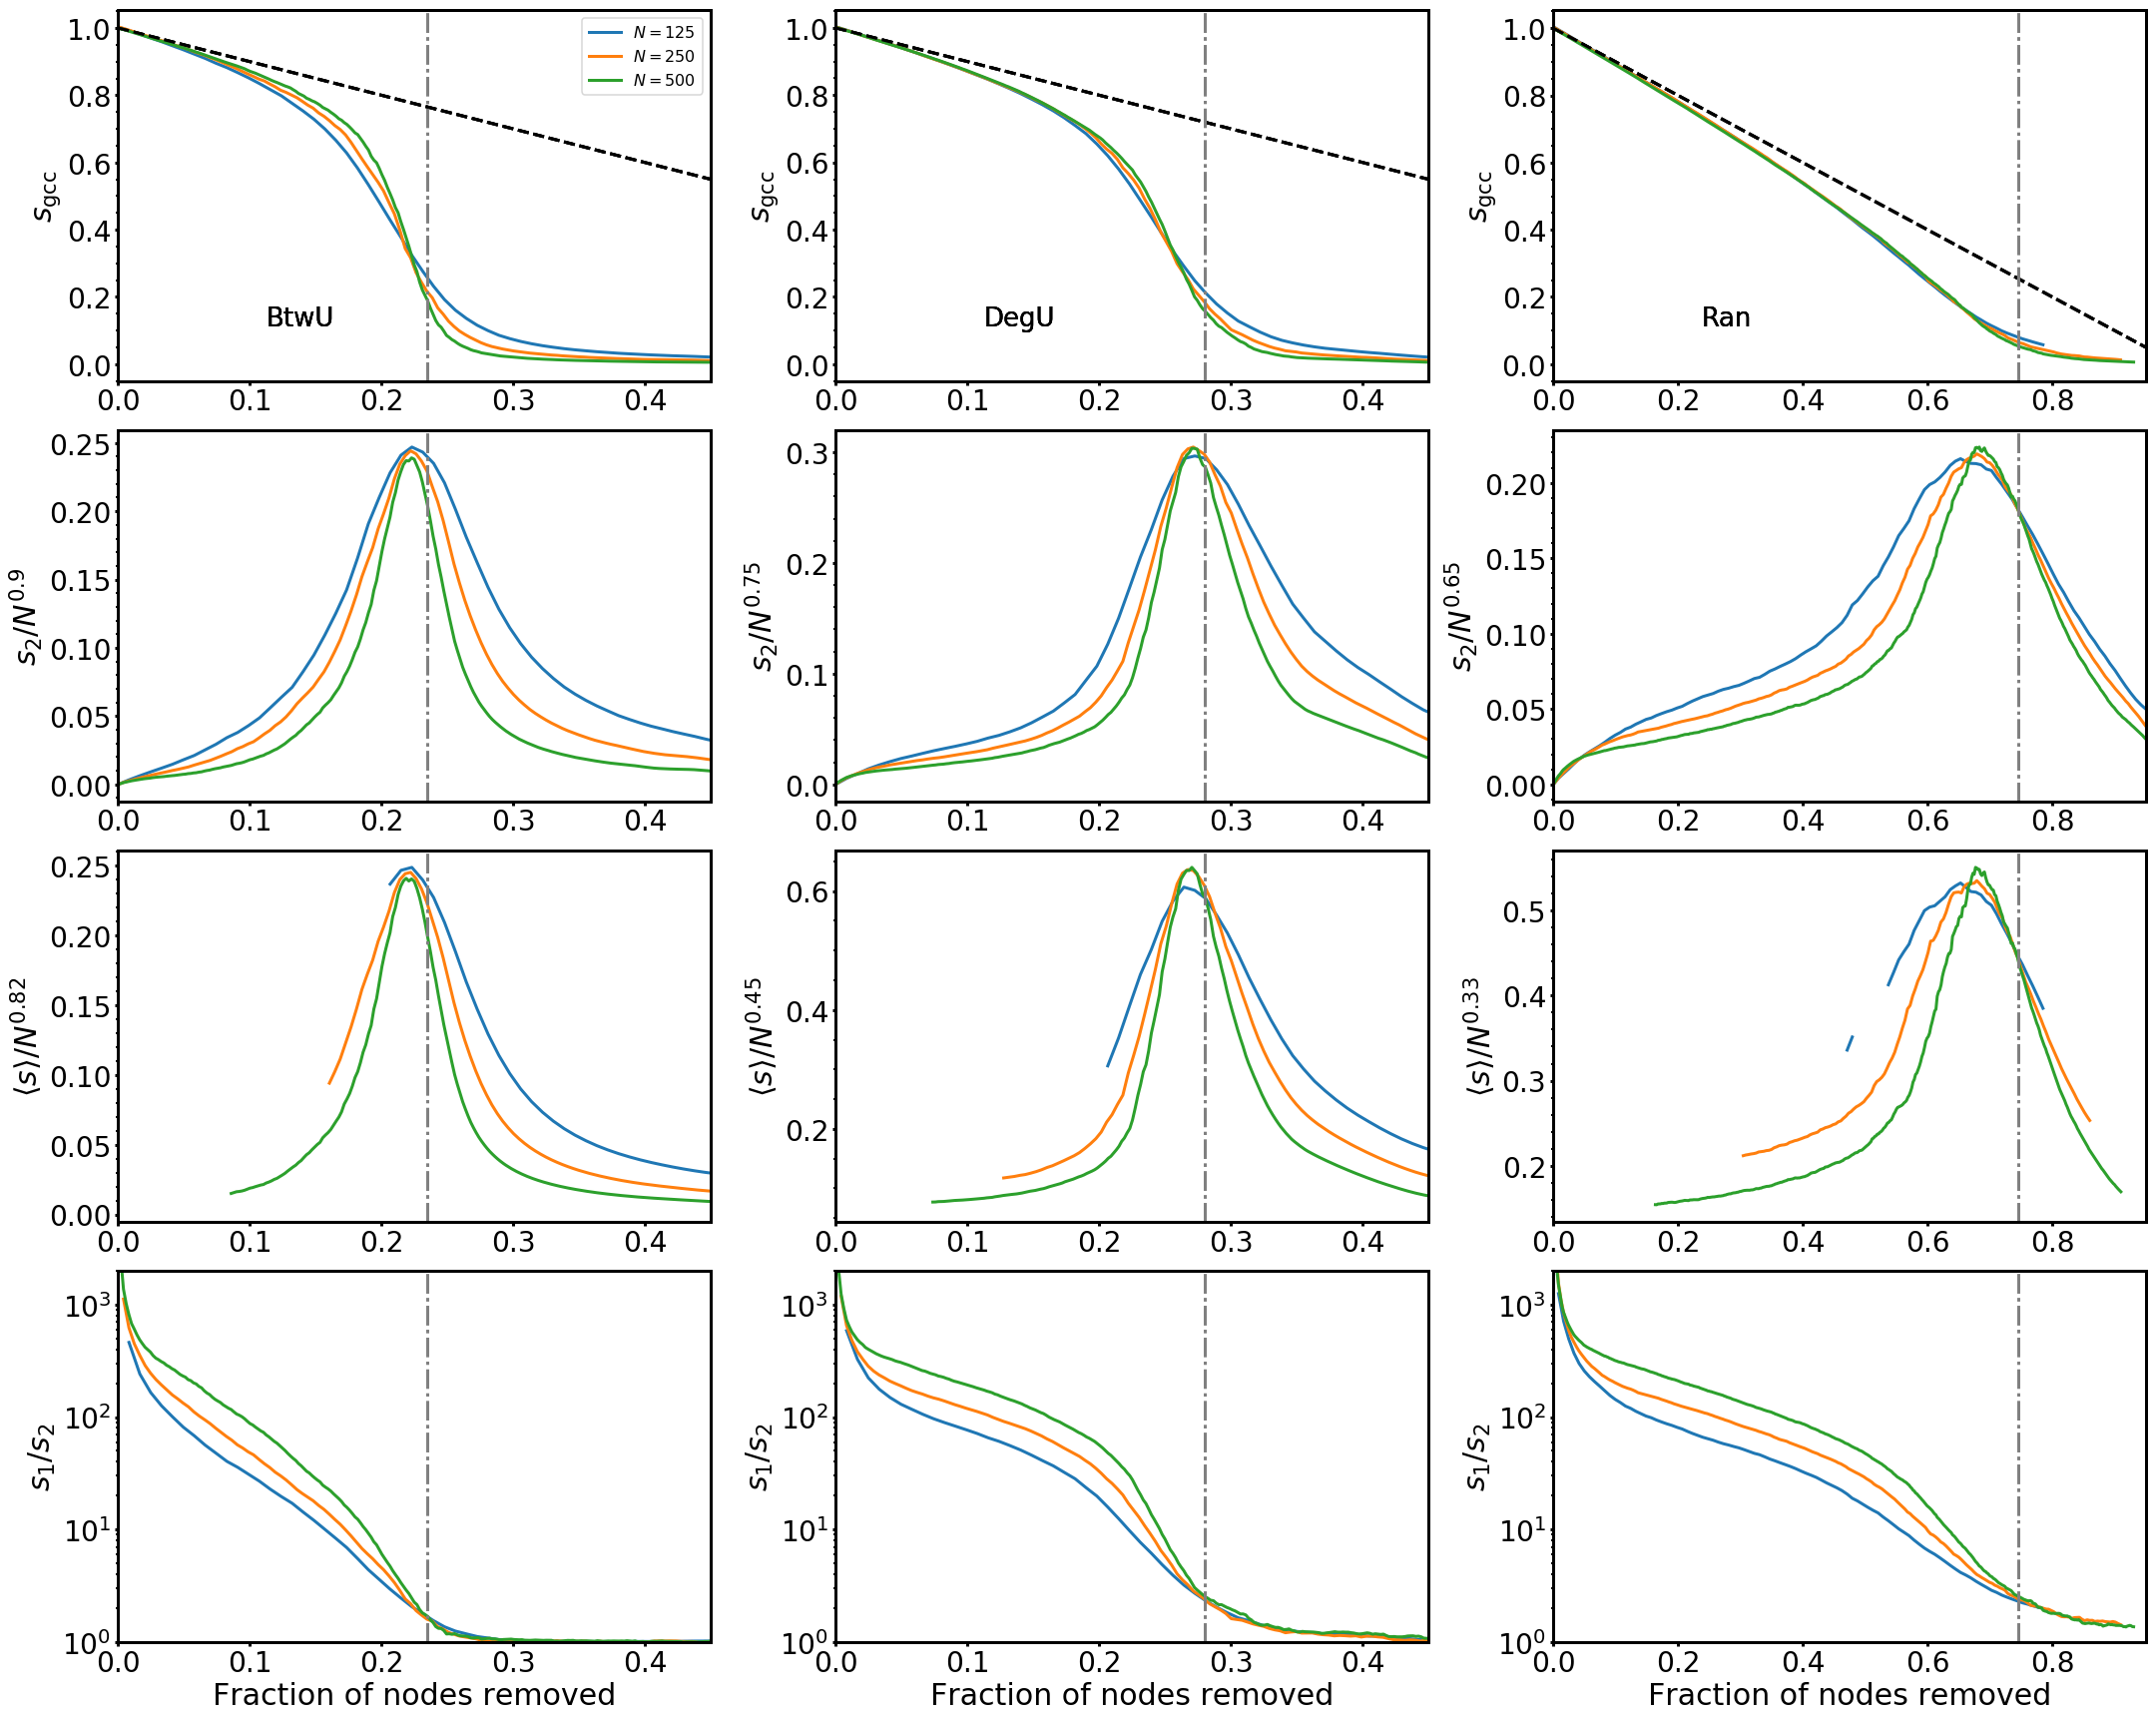

In [282]:
#xlims = [(0.2, 0.3), (0.2, 0.4), (0., 1)]
xlims = [(0., 0.45), (0., 0.45), (0., 0.95)]
vlines = [0.235, 0.28, 0.745]
scaled = True
fig, axes = plt.subplots(figsize=(10*3, 6*4), ncols=3, nrows=4)

for i, attack in enumerate(attacks):
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        ax = axes[0][i]
        ax.set_ylabel(r'$s_{\mathrm{gcc}}$')
        ax.set_xlabel('')
        ax.set_xlim(xlims[i])
        if False:
            if attack == 'BtwU':
                ax.set_ylim(0, 0.8)
            if attack == 'DegU':
                ax.set_ylim(0, 0.65)
            if attack == 'Ran':
                ax.set_ylim(0, 0.45)
            
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0
        if i == 0:
            ax.plot(X, Y, label=r'$N = $' + '{}'.format(N))
            ax.legend(loc='best', fontsize=16)
        else:
            ax.plot(X, Y)
        
        line_x = np.arange(0, 1.01, 0.01)
        line_y = 1 - line_x
        ax.plot(line_x, line_y, '--', color='k')
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.text(0.25, 0.15, attack, transform=ax.transAxes, fontsize=26)
        
        
        ax = axes[1][i]
        if N > 2000:
            continue
        
        ax.set_xlabel('')
        ax.set_xlim(xlims[i])

        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Nsec_values[N][attack][:Ngcc0]
        if scaled:
            if i == 0:
                ax.plot(X, Y/(N**0.9))
                ax.set_ylabel(r'$s_2/N^{0.9}$')
            elif i == 1:
                ax.plot(X, Y/(N**0.75))
                ax.set_ylabel(r'$s_2/N^{0.75}$')
            elif i == 2:
                ax.plot(X, Y/(N**0.65))
                ax.set_ylabel(r'$s_2/N^{0.65}$')
        else:
            if i == 0:
                ax.plot(X, Y)
            elif i == 1:
                ax.plot(X, Y)
            elif i == 2:
                ax.plot(X, Y)
            ax.set_ylabel(r'$s_2$')
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        
        
        ax = axes[2][i]
        if N > 2000:
            continue
        ax.set_xlabel('')
        ax.set_xlim(xlims[i]) 
        
        X = np.arange(Ngcc0) / Ngcc0
        Y1 = mean_finiteSizeMeassures['meanS'][N][attack][:Ngcc0]
        Y2 = mean_finiteSizeMeassures['meanS2'][N][attack][:Ngcc0]
        Y3 = mean_finiteSizeMeassures['binder'][N][attack][:Ngcc0]
        Y4 = mean_finiteSizeMeassures['binder2'][N][attack][:Ngcc0]
        if scaled:
            if i == 0:
                ax.plot(X, Y1/(N**0.82))
                ax.set_ylabel(r'$\langle s \rangle/N^{0.82}$')
                #ax.plot(X, Y2)
                #ax.plot(X, Y3)
                #ax.plot(X, Y4)
            elif i == 1:
                ax.plot(X, Y1/(N**0.45))
                ax.set_ylabel(r'$\langle s \rangle/N^{0.45}$')
                #ax.plot(X, Y2)
                #ax.plot(X, Y3)
                #ax.plot(X, Y4)
            elif i == 2:
                ax.plot(X, Y1/(N**0.33))
                ax.set_ylabel(r'$\langle s \rangle/N^{0.33}$')
                #ax.plot(X, Y2)
                #ax.plot(X, Y3)
                #ax.plot(X, Y4)
        else:
            if i == 0:
                ax.plot(X, Y1)
                #ax.plot(X, Y2)
                #ax.plot(X, Y3)
                #ax.plot(X, Y4)
            elif i == 1:
                ax.plot(X, Y1)
                #ax.plot(X, Y2)
                #ax.plot(X, Y3)
                #ax.plot(X, Y4)
            elif i == 2:
                ax.plot(X, Y1)
                #ax.plot(X, Y2)
                #ax.plot(X, Y3)
                #ax.plot(X, Y4)
            ax.set_ylabel(r'$\langle s \rangle$')
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        
        
        ax = axes[3][i]
        if N > 2000:
            continue
        ax.set_ylabel(r'$s_1 / s_2$')
        ax.set_xlabel('Fraction of nodes removed')
        #ax.set_xscale('log')
        ax.set_yscale('log')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / mean_Nsec_values[N][attack][:Ngcc0]
        ax.plot(X, Y)
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_xlim(xlims[i])  
        
        ax.set_ylim(1, 2000)
        #if i == 0:
        #    ax.set_ylim(1, 10)
        #else:
        #    ax.set_ylim(1, 100)

plt.tight_layout()
if scaled:
    fig_base_name = 'Percolation_ER_scaled'
else:
    fig_base_name = 'Percolation_ER'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

### Btw order parameters

In [276]:
net_dir_name = '../networks/ER'

N_values = [125, 250, 500]#, 1000, 2000]
p_values = [0.032, 0.016, 0.008]#, 0.004, 0.002]
seeds_by_N = [range(2000), range(1690), range(600)]#, range(1000), range(680)]

attacks = ['BtwU', 'DegU', 'Ran']

spin_types = [0, 1, 2, 3, 4]

spin_sums = {}
for spin_type in spin_types:
    spin_sums[spin_type] = {}

mean_spin_sums = {}
var_spin_sums  = {}    
for spin_type in spin_types:
    mean_spin_sums[spin_type] = {}
    var_spin_sums[spin_type]  = {}
    
for N, p, seeds in zip(N_values, p_values, seeds_by_N):
    print(N)
    for spin_type in spin_types:
        spin_sums[spin_type][N] = {}


    for spin_type in spin_types:
        mean_spin_sums[spin_type][N] = {}
        var_spin_sums[spin_type][N]  = {}

    for attack in attacks:
        
        for spin_type in spin_types:
            spin_sums[spin_type][N][attack] = []
        
        for seed in seeds:
                       
            network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)
            network_file = network + '.txt'
            full_network_path = os.path.join(net_dir_name, network, network_file)
            
            attack_dir_name = os.path.join(net_dir_name, network, attack)
            
            full_btw_file_name  = os.path.join(attack_dir_name, 'orderParams.txt')
            _spin_meassures = np.loadtxt(full_btw_file_name)
                       
            spin_sums[0][N][attack].append(_spin_meassures[:,0])
            spin_sums[1][N][attack].append(_spin_meassures[:,1])
            spin_sums[2][N][attack].append(_spin_meassures[:,2])
            spin_sums[3][N][attack].append(_spin_meassures[:,3])
            spin_sums[4][N][attack].append(_spin_meassures[:,4])

        for spin_type in spin_types:
            mean_spin_sums[spin_type][N][attack] = np.mean(spin_sums[spin_type][N][attack], axis=0)
            var_spin_sums[spin_type][N][attack] = np.var(spin_sums[spin_type][N][attack], axis=0)

125
250
500


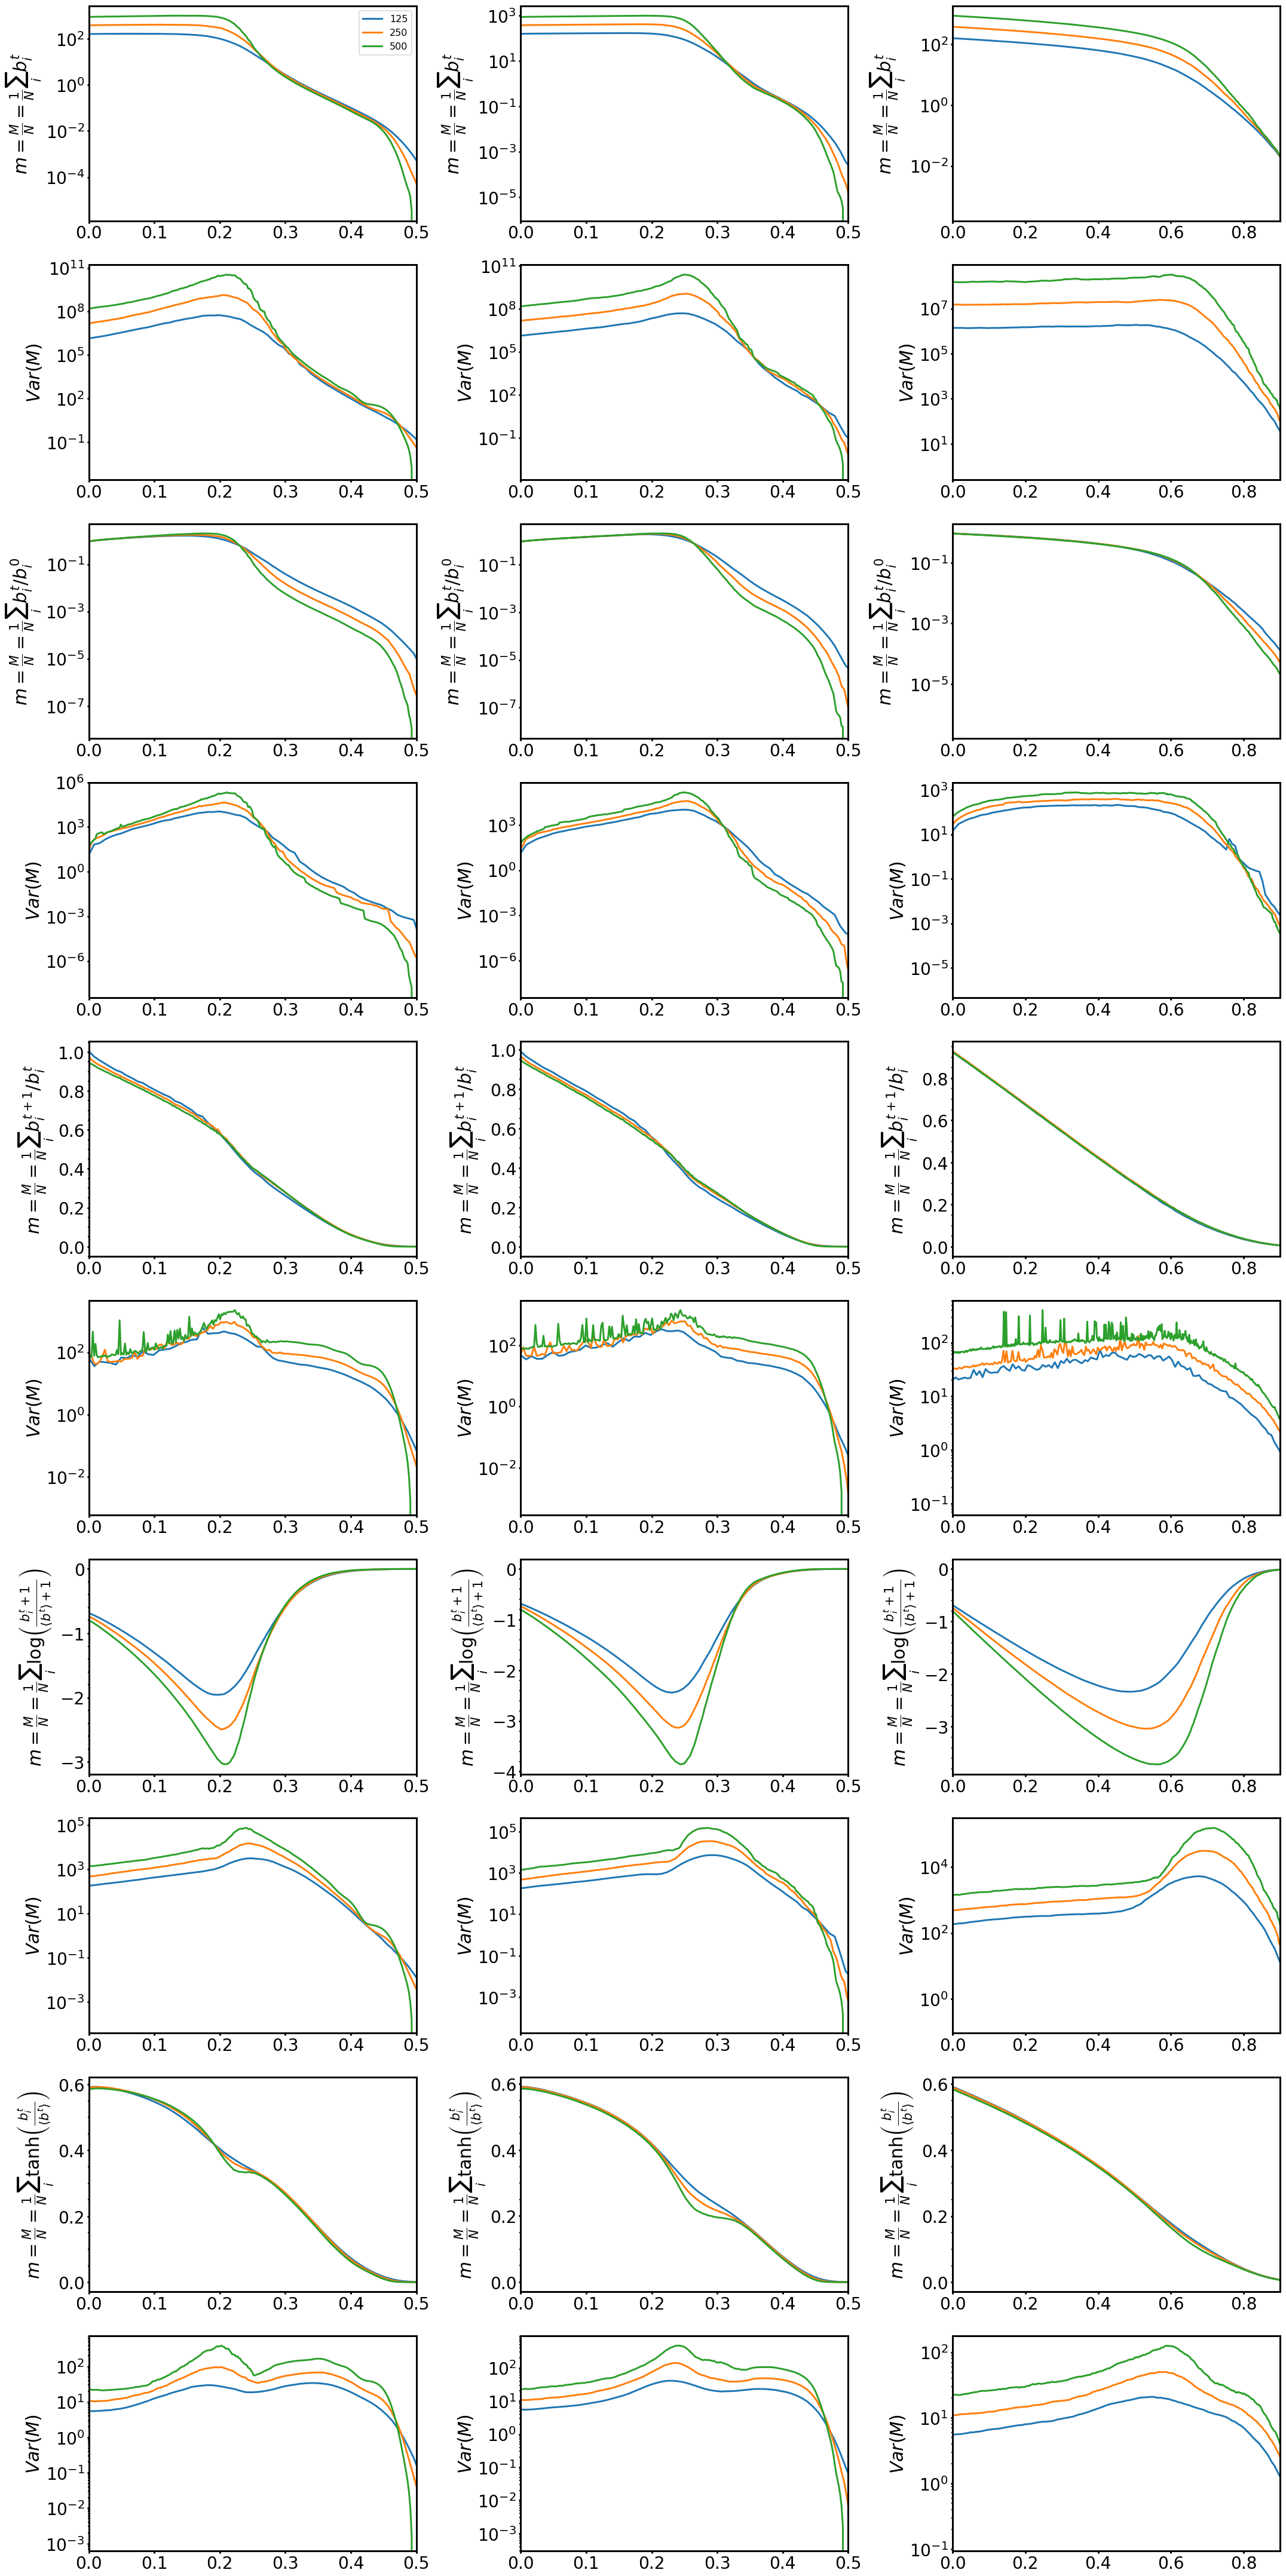

In [277]:
xlims = [(0, 0.5), (0, 0.5), (0, 0.9)]

ncols = 3
nrows = 10
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
           
        ax = axes[0][i]
        ax.set_ylabel(r'$M = \sum_i b_i^t$')
        ax.set_ylabel(r'$m = \frac{M}{N} = \frac{1}{N} \sum_i b_i^t$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_spin_sums[0][N][attack][:Ngcc0] / Ngcc0
        ax.set_xlim(xlims[i])
        ax.set_yscale('log')
        if i == 0:
            ax.plot(X, Y, label=N)   
            ax.legend(loc='best', fontsize=16)
        else:
            ax.plot(X, Y)   
        
        ax = axes[1][i]
        ax.set_ylabel(r'$Var(M)$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = var_spin_sums[0][N][attack][:Ngcc0] 
        ax.set_xlim(xlims[i])
        ax.set_yscale('log')
        ax.plot(X, Y)  

        ax = axes[2][i]
        ax.set_ylabel(r'$M = \sum_i b_i^t / b_i^0$')
        ax.set_ylabel(r'$m = \frac{M}{N} = \frac{1}{N} \sum_i b_i^t / b_i^0$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_spin_sums[1][N][attack][:Ngcc0] / Ngcc0
        ax.set_xlim(xlims[i])
        ax.set_yscale('log')
        ax.plot(X, Y)   

        ax = axes[3][i]
        ax.set_ylabel(r'$Var(M)$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = var_spin_sums[1][N][attack][:Ngcc0]
        ax.set_xlim(xlims[i])
        ax.set_yscale('log')
        ax.plot(X, Y)  
        
        ax = axes[4][i]
        ax.set_ylabel(r'$M = \sum_i b_i^{t+1} / b_i^{t}$')
        ax.set_ylabel(r'$m = \frac{M}{N} = \frac{1}{N} \sum_i b_i^{t+1} / b_i^{t}$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_spin_sums[2][N][attack][:Ngcc0] / Ngcc0
        ax.set_xlim(xlims[i])
        ax.plot(X, Y)   
        
        ax = axes[5][i]
        ax.set_ylabel(r'$Var(M)$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = var_spin_sums[2][N][attack][:Ngcc0]
        ax.set_xlim(xlims[i])
        ax.set_yscale('log')
        ax.plot(X, Y)  
        
        ax = axes[6][i]
        ax.set_ylabel(r'$M = \sum_i \log \left( \frac{b_i^t + 1}{\langle b^t \rangle + 1} \right)$')
        ax.set_ylabel(r'$m = \frac{M}{N} = \frac{1}{N} \sum_i \log \left( \frac{b_i^t + 1}{\langle b^t \rangle + 1} \right)$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_spin_sums[3][N][attack][:Ngcc0] / Ngcc0
        ax.set_xlim(xlims[i])
        ax.plot(X, Y)   
        
        ax = axes[7][i]
        ax.set_ylabel(r'$Var(M)$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = var_spin_sums[3][N][attack][:Ngcc0]
        ax.set_xlim(xlims[i])
        ax.set_yscale('log')
        ax.plot(X, Y)  
        
        
        ax = axes[8][i]
        ax.set_ylabel(r'$M = \sum_i \tanh \left( \frac{b_i^t}{\langle b^t \rangle} \right)$')
        ax.set_ylabel(r'$m = \frac{M}{N} = \frac{1}{N} \sum_i \tanh \left( \frac{b_i^t}{\langle b^t \rangle} \right)$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_spin_sums[4][N][attack][:Ngcc0] / Ngcc0
        ax.set_xlim(xlims[i])
        ax.plot(X, Y)   
        
        ax = axes[9][i]
        ax.set_ylabel(r'$Var(M)$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = var_spin_sums[4][N][attack][:Ngcc0]
        ax.set_xlim(xlims[i])
        ax.set_yscale('log')
        ax.plot(X, Y) 


plt.tight_layout()
fig_base_name = 'ER_orderParams'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

### Btw distribution parameters

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in true_divide


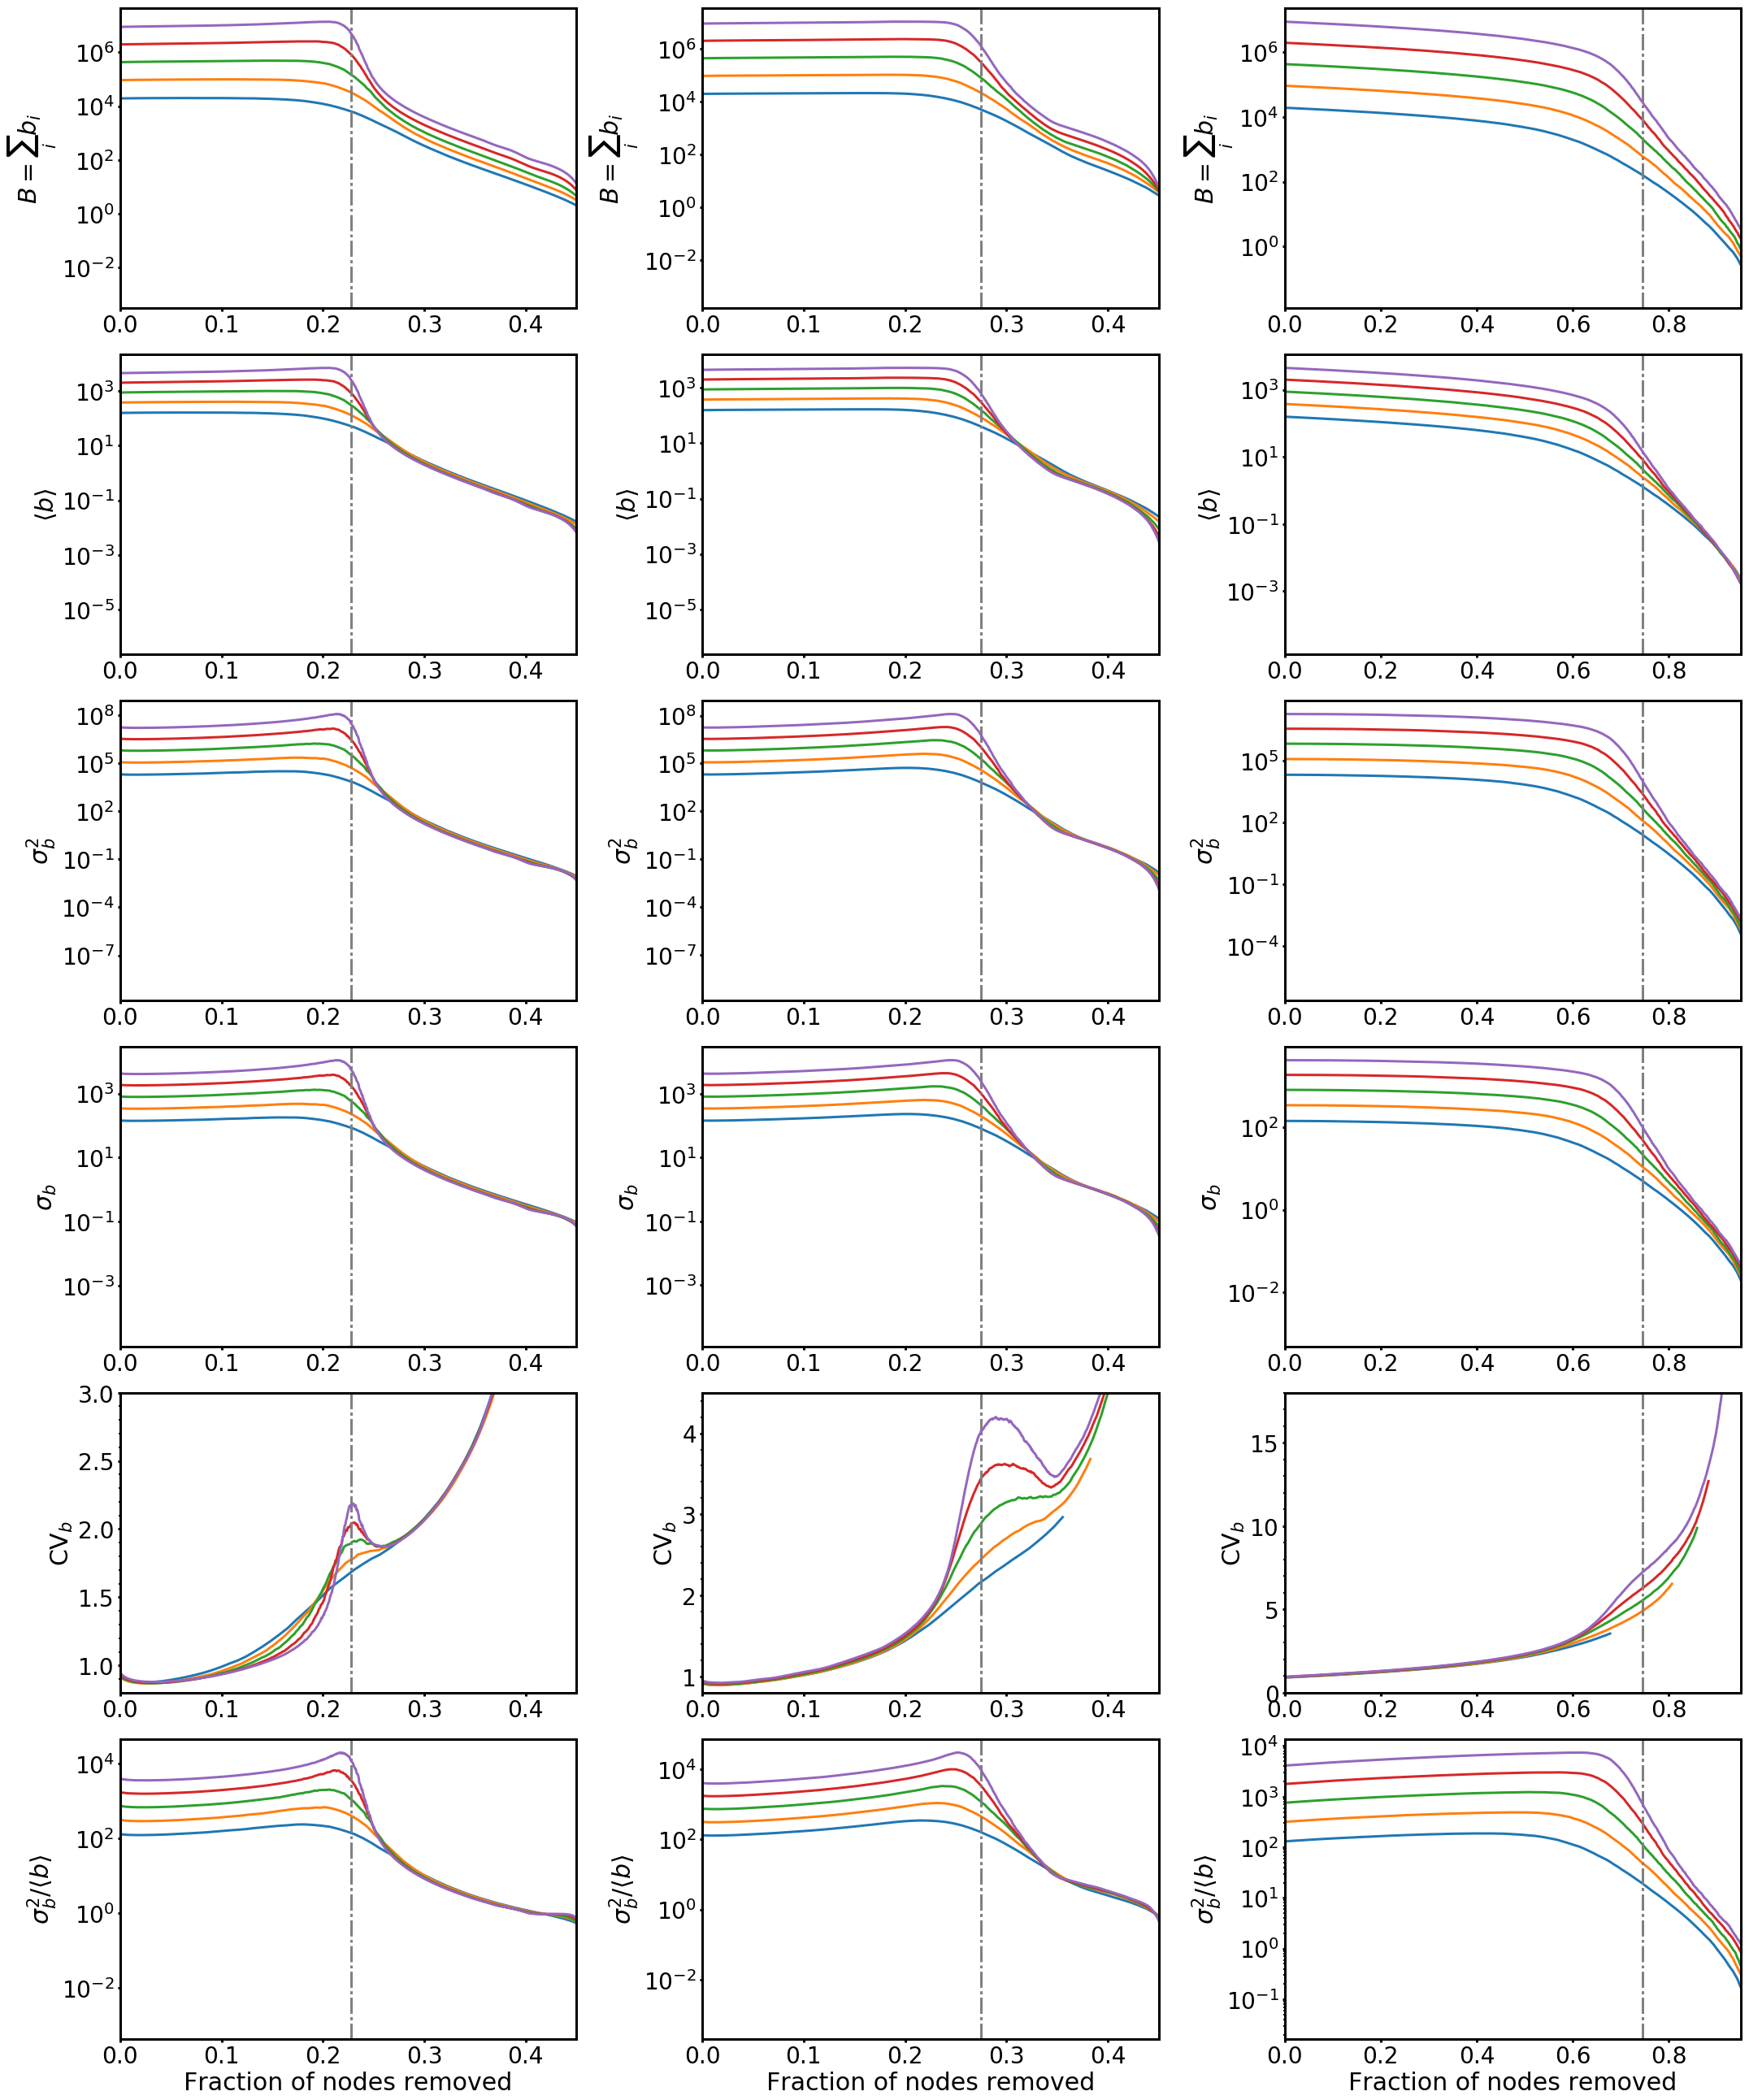

In [261]:
vlines = [0.228, 0.275, 0.745]

ylims = [(0.8, 3), (0.8, 4.5), (0, 18)]

ncols = 3
nrows = 6
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
                     
        ax = axes[0][i]
        ax.set_ylabel(r'$B = \sum_i b_i$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_sum[N][attack][:Ngcc0]
        ax.set_xlim(xlims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_yscale('log')
        ax.plot(X, Y)            
       
        
        ax = axes[1][i]
        ax.set_ylabel(r'$\langle b \rangle$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_mean[N][attack][:Ngcc0] 
        ax.set_xlim(xlims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_yscale('log')
        ax.plot(X, Y)

        ax = axes[2][i]
        ax.set_ylabel(r'$\sigma^2_b$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_std[N][attack][:Ngcc0]**2 
        ax.set_xlim(xlims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_yscale('log')
        ax.plot(X, Y)
        
        ax = axes[3][i]
        ax.set_ylabel(r'$\sigma_b$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_std[N][attack][:Ngcc0]
        ax.set_xlim(xlims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_yscale('log')
        ax.plot(X, Y)
        
        ax = axes[4][i]
        ax.set_ylabel(r'$\mathrm{CV}_b$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_CV[N][attack][:Ngcc0]
        ax.set_xlim(xlims[i])
        ax.set_ylim(ylims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.plot(X, Y)
        
        ax = axes[5][i]
        ax.set_ylabel(r'$\sigma^2_b/\langle b \rangle$')
        ax.set_xlabel('Fraction of nodes removed')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_std[N][attack][:Ngcc0]**2 / mean_btw_mean[N][attack][:Ngcc0]
        ax.set_xlim(xlims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_yscale('log')
        ax.plot(X, Y)

plt.tight_layout()
fig_base_name = 'Btw_dist_params_ER'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

### Difference between attacks

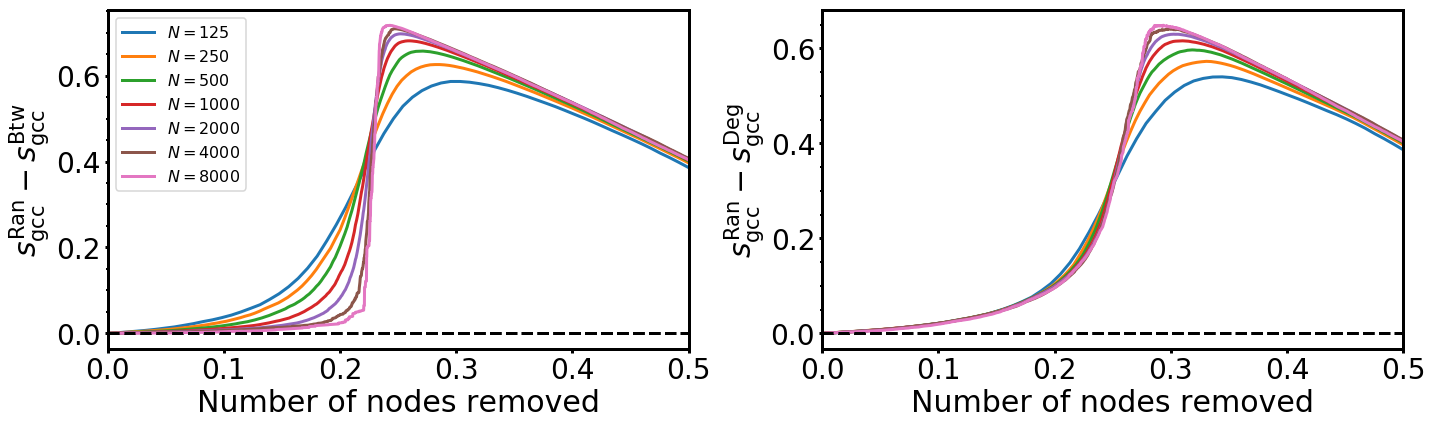

In [36]:
fig, axes = plt.subplots(figsize=(10*2, 6*1), ncols=2, nrows=1)

x_lims = [(0, 0.5), (0, 0.5), (0, 1)]

for i, attack in enumerate(attacks):
    if i > 1:
        continue
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        ax = axes[i]
        #ax.set_xlabel('Fraction of removed nodes')
        ax.set_xlabel('Number of nodes removed')
        
        line_x = np.arange(0, 1.01, Ngcc0)
        line_y = 1 - line_x
        
        X = np.arange(Ngcc0) / Ngcc0
        Y = (mean_Ngcc_values[N]['Ran'][:Ngcc0] / Ngcc0) - (mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0) 
        ax.set_xlim(x_lims[i])
        
        if i == 0:
            ax.set_ylabel(r'$s^{\mathrm{Ran}}_{\mathrm{gcc}} - s^{\mathrm{Btw}}_{\mathrm{gcc}} $')
            ax.plot(X, Y, label=r'$N = $' + '{}'.format(N))
            ax.legend(loc='best', fontsize=16)
        elif i == 1:
            ax.set_ylabel(r'$s^{\mathrm{Ran}}_{\mathrm{gcc}} - s^{\mathrm{Deg}}_{\mathrm{gcc}} $')
            ax.plot(X, Y)
        ax.axhline(0, linestyle='--', color='k')
        #ax.set_xlim(0.20, 0.25)
        

        #ax.set_xlim(0.1, 0.3)

plt.tight_layout()

fig_base_name = 'Percolation2_ER'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

### Modularity analysis

In [125]:
net_dir_name = '../networks/ER'

N_values = [125, 250, 500, 1000, 2000, 4000, 8000]
p_values = [0.032, 0.016, 0.008, 0.004, 0.002, 0.001, 0.0005]
seeds_by_N = [range(1000), range(100), range(100), range(58), range(86), range(10), range(3)]

attacks = ['BtwU', 'DegU', 'Ran']


q_values = {}
mean_q_values = {}
std_q_values = {}

Ngcc_values = {}
mean_Ngcc_values = {}
    
for N, p, seeds in zip(N_values, p_values, seeds_by_N):

    q_values[N] = {}    
    mean_q_values[N] = {}
    std_q_values[N] = {}
    
    Ngcc_values[N] = {}
    mean_Ngcc_values[N] = {}

    for attack in attacks:
        
        q_values[N][attack] = []
        
        Ngcc_values[N][attack] = []
        
        for seed in seeds:
                       
            network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)
            network_file = network + '.txt'
            full_network_path = os.path.join(net_dir_name, network, network_file)
            
            attack_dir_name = os.path.join(net_dir_name, network, attack)
            
            full_q_values_file_name  = os.path.join(attack_dir_name, 'q_values.txt')
            data = np.loadtxt(full_q_values_file_name)
            
            _q_values = data[:,0]
            _Ngcc_values = data[:,1]
            
            q_values[N][attack].append(_q_values)
            Ngcc_values[N][attack].append(_Ngcc_values)

        mean_q_values[N][attack] = np.mean(q_values[N][attack], axis=0)
        std_q_values[N][attack] = np.std(q_values[N][attack], axis=0)
        
        mean_Ngcc_values[N][attack] = np.mean(Ngcc_values[N][attack], axis=0)

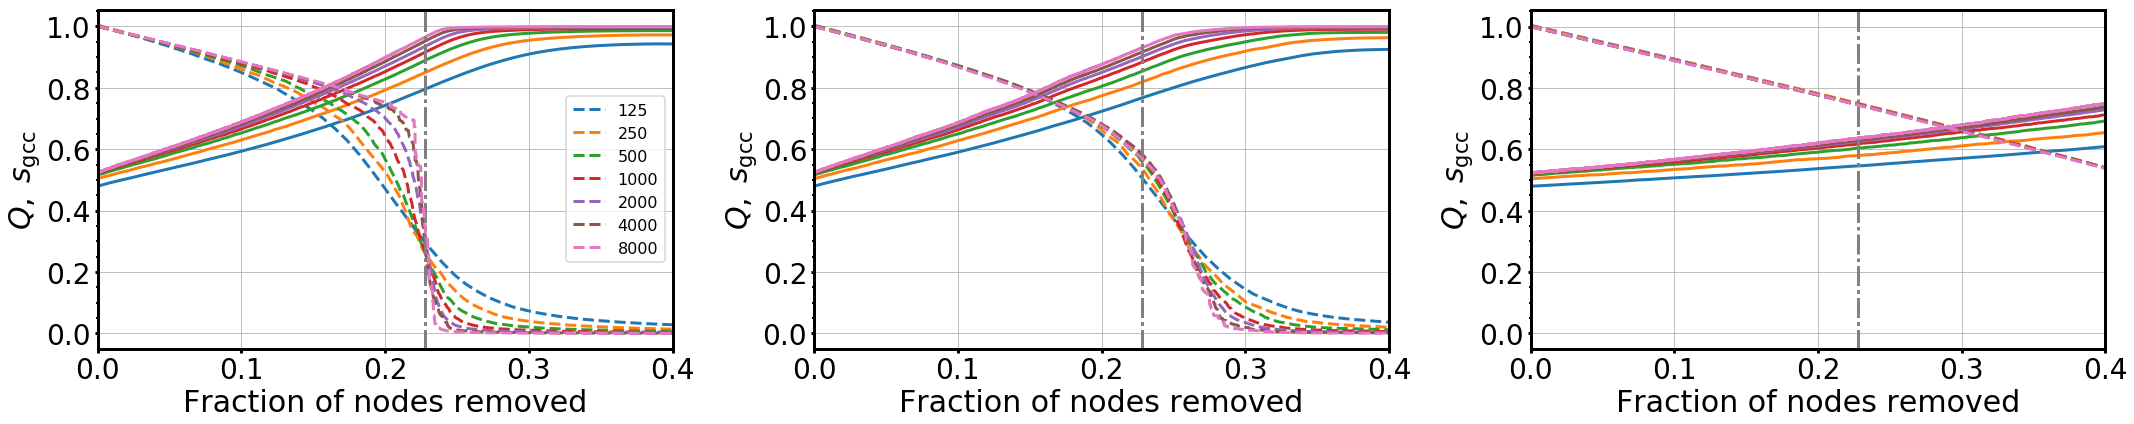

In [126]:
vlines = [0.228, 0.275, 0.745]

ncols = 3
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):
    ax = axes[i]
    for j, N in enumerate(N_values):
        
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_q_values[N][attack][:Ngcc0]
        Y_err = std_q_values[N][attack][:Ngcc0]
        ax.plot(X, Y, color=colors[j])
        #ax.fill_between(X, Y-Y_err, Y+Y_err, alpha=0.3)
        #ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.axvline(vlines[0], linestyle='-.', color='grey')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0
        if i == 0:
            ax.plot(X, Y, linestyle='--', color=colors[j], label=N)
            ax.legend(loc='best', fontsize=16)
        else:
            ax.plot(X, Y, linestyle='--', color=colors[j])
        ax.set_xlim(0, 0.4)
        ax.grid(True)
        ax.set_ylabel(r'$Q,\; s_{\mathrm{gcc}}$')
        ax.set_xlabel('Fraction of nodes removed')
        
plt.tight_layout()
fig_base_name = 'ER_modularity'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

In [280]:
import pickle
import bz2

def counterToList(counter):

    try:
        counter[0][0]
    except:
        return [counter[0]]

    lst = []
    for s, ns in counter:
        lst += [s]*ns
    return sorted(lst, reverse=True)

N = 2000
p = 0.002
seeds = range(685)

all_comp_sizes_lst = {}
for attack in attacks: 
    print(attack)
    
    all_comp_sizes_lst[attack] = []
    for seed in seeds:     
        
        network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)
        #print(network)
        network_file = network + '.txt'
        full_network_path = os.path.join(net_dir_name, network, network_file)
        
        attack_dir_name = os.path.join(net_dir_name, network, attack)
        comp_sizes_file  = os.path.join(attack_dir_name, 'componentSizes.pickle.bz2')
        with bz2.BZ2File(comp_sizes_file, 'r') as f:
            comp_sizes_values = pickle.load(f)
            
        if attack == 'BtwU':
            comp_sizes = comp_sizes_values[int(N*0.228)]
        elif attack == 'DegU':
            comp_sizes = comp_sizes_values[int(N*0.275)]
        elif attack == 'Ran':
            comp_sizes = comp_sizes_values[int(N*0.745)]
        comp_sizes_lst = counterToList(comp_sizes)
        if len(comp_sizes_lst) == 1:
            continue
            
        all_comp_sizes_lst[attack] += comp_sizes_lst
        

BtwU
DegU
Ran


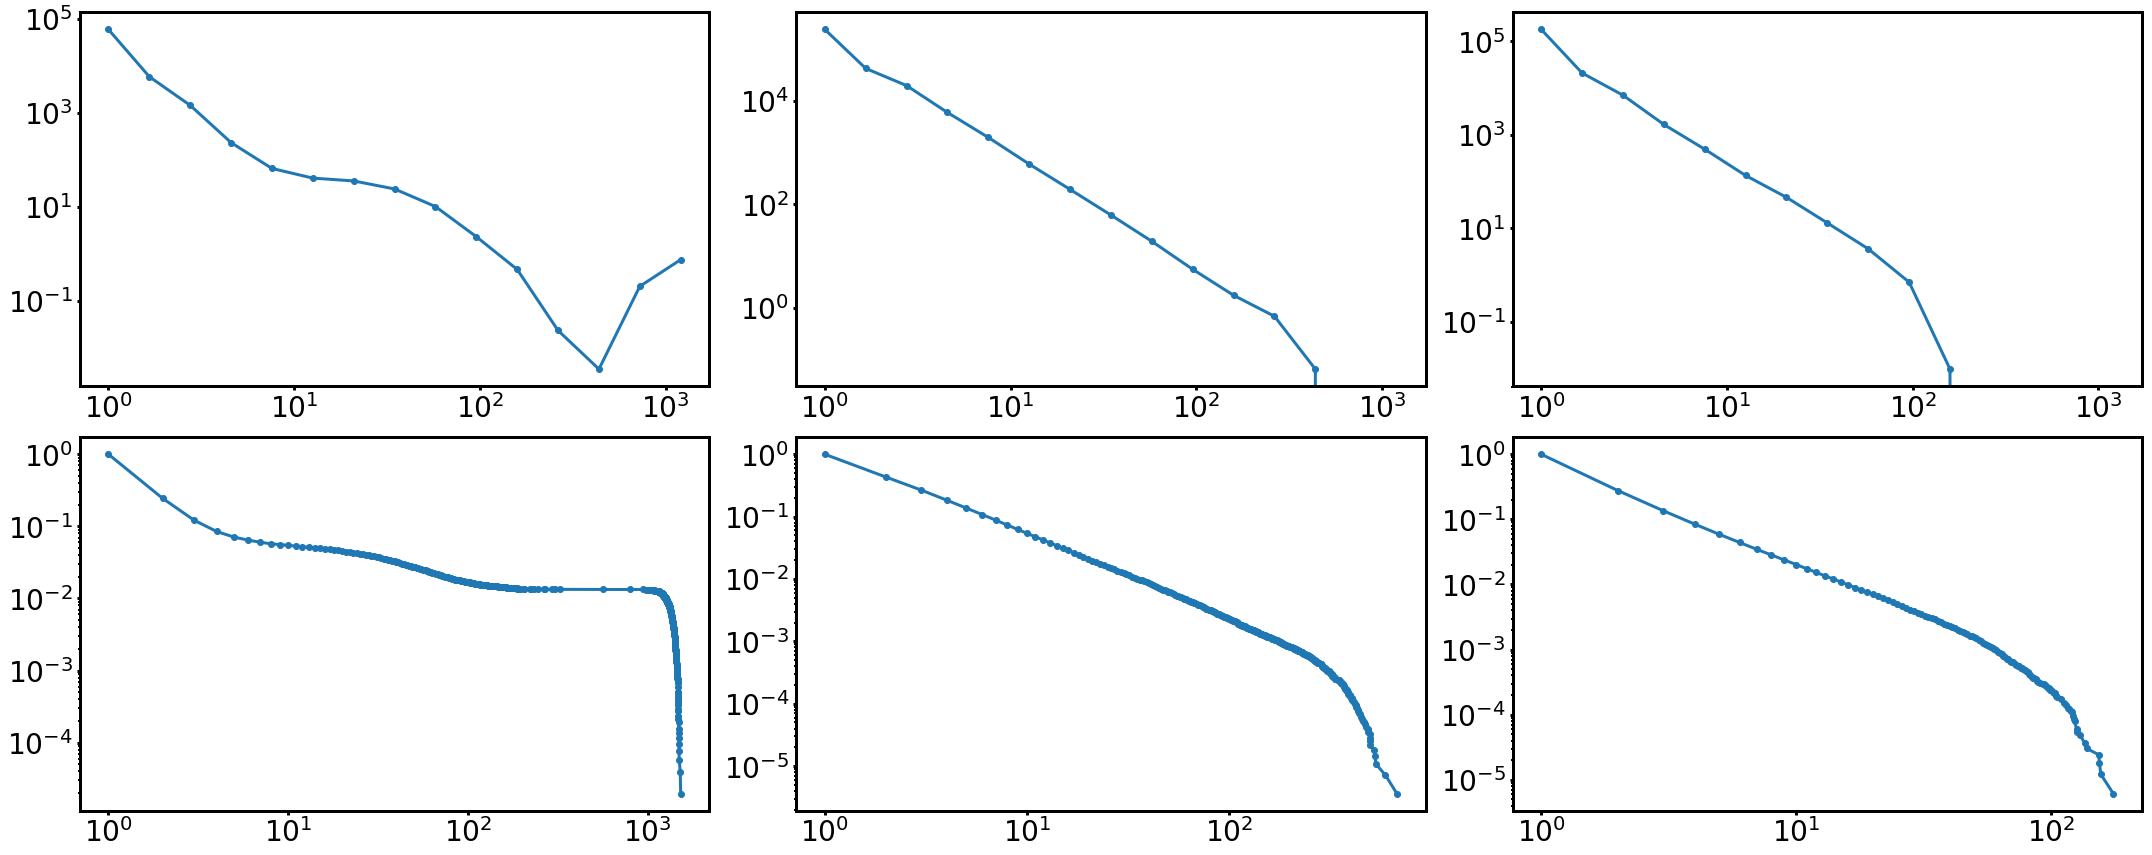

In [281]:
def get_ccdf(data):
    """
    Plot the complementary cumulative distribution function
    (1-CDF(x)) based on the data on the axes object.
    
    Note that this way of computing and plotting the ccdf is not
    the best approach for a discrete variable, where many
    observations can have exactly same value!
    """
    # Note that, here we use the convention for presenting an 
    # empirical 1-CDF (ccdf) as discussed above
    sorted_vals = np.sort(np.unique(data))
    ccdf = np.zeros(len(sorted_vals))
    n = float(len(data))
    for i, val in enumerate(sorted_vals):
        ccdf[i] = np.sum(data >= val)/n
    return sorted_vals, ccdf
    

# log-scaled bins
bins = np.logspace(0, np.log10(N), 16)
widths = (bins[1:] - bins[:-1])

ncols = 3
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes[0][0]
Y = all_comp_sizes_lst['BtwU']
hist = np.histogram(Y, bins=bins)
hist_norm = hist[0]/widths
ax.plot(bins[:-1], hist_norm, 'o-')
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[1][0]
sorted_vals, ccdf = get_ccdf(Y)
ax.plot(sorted_vals, ccdf, 'o-')
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[0][1]
Y = all_comp_sizes_lst['DegU']
hist = np.histogram(Y, bins=bins)
hist_norm = hist[0]/widths
ax.plot(bins[:-1], hist_norm, 'o-')
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[1][1]
sorted_vals, ccdf = get_ccdf(Y)
ax.plot(sorted_vals, ccdf, 'o-')
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[0][2]
Y = all_comp_sizes_lst['Ran']
hist = np.histogram(Y, bins=bins)
hist_norm = hist[0]/widths
ax.plot(bins[:-1], hist_norm, 'o-')
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[1][2]
sorted_vals, ccdf = get_ccdf(Y)
ax.plot(sorted_vals, ccdf, 'o-')
ax.set_xscale('log')
ax.set_yscale('log')


plt.tight_layout()
plt.show()

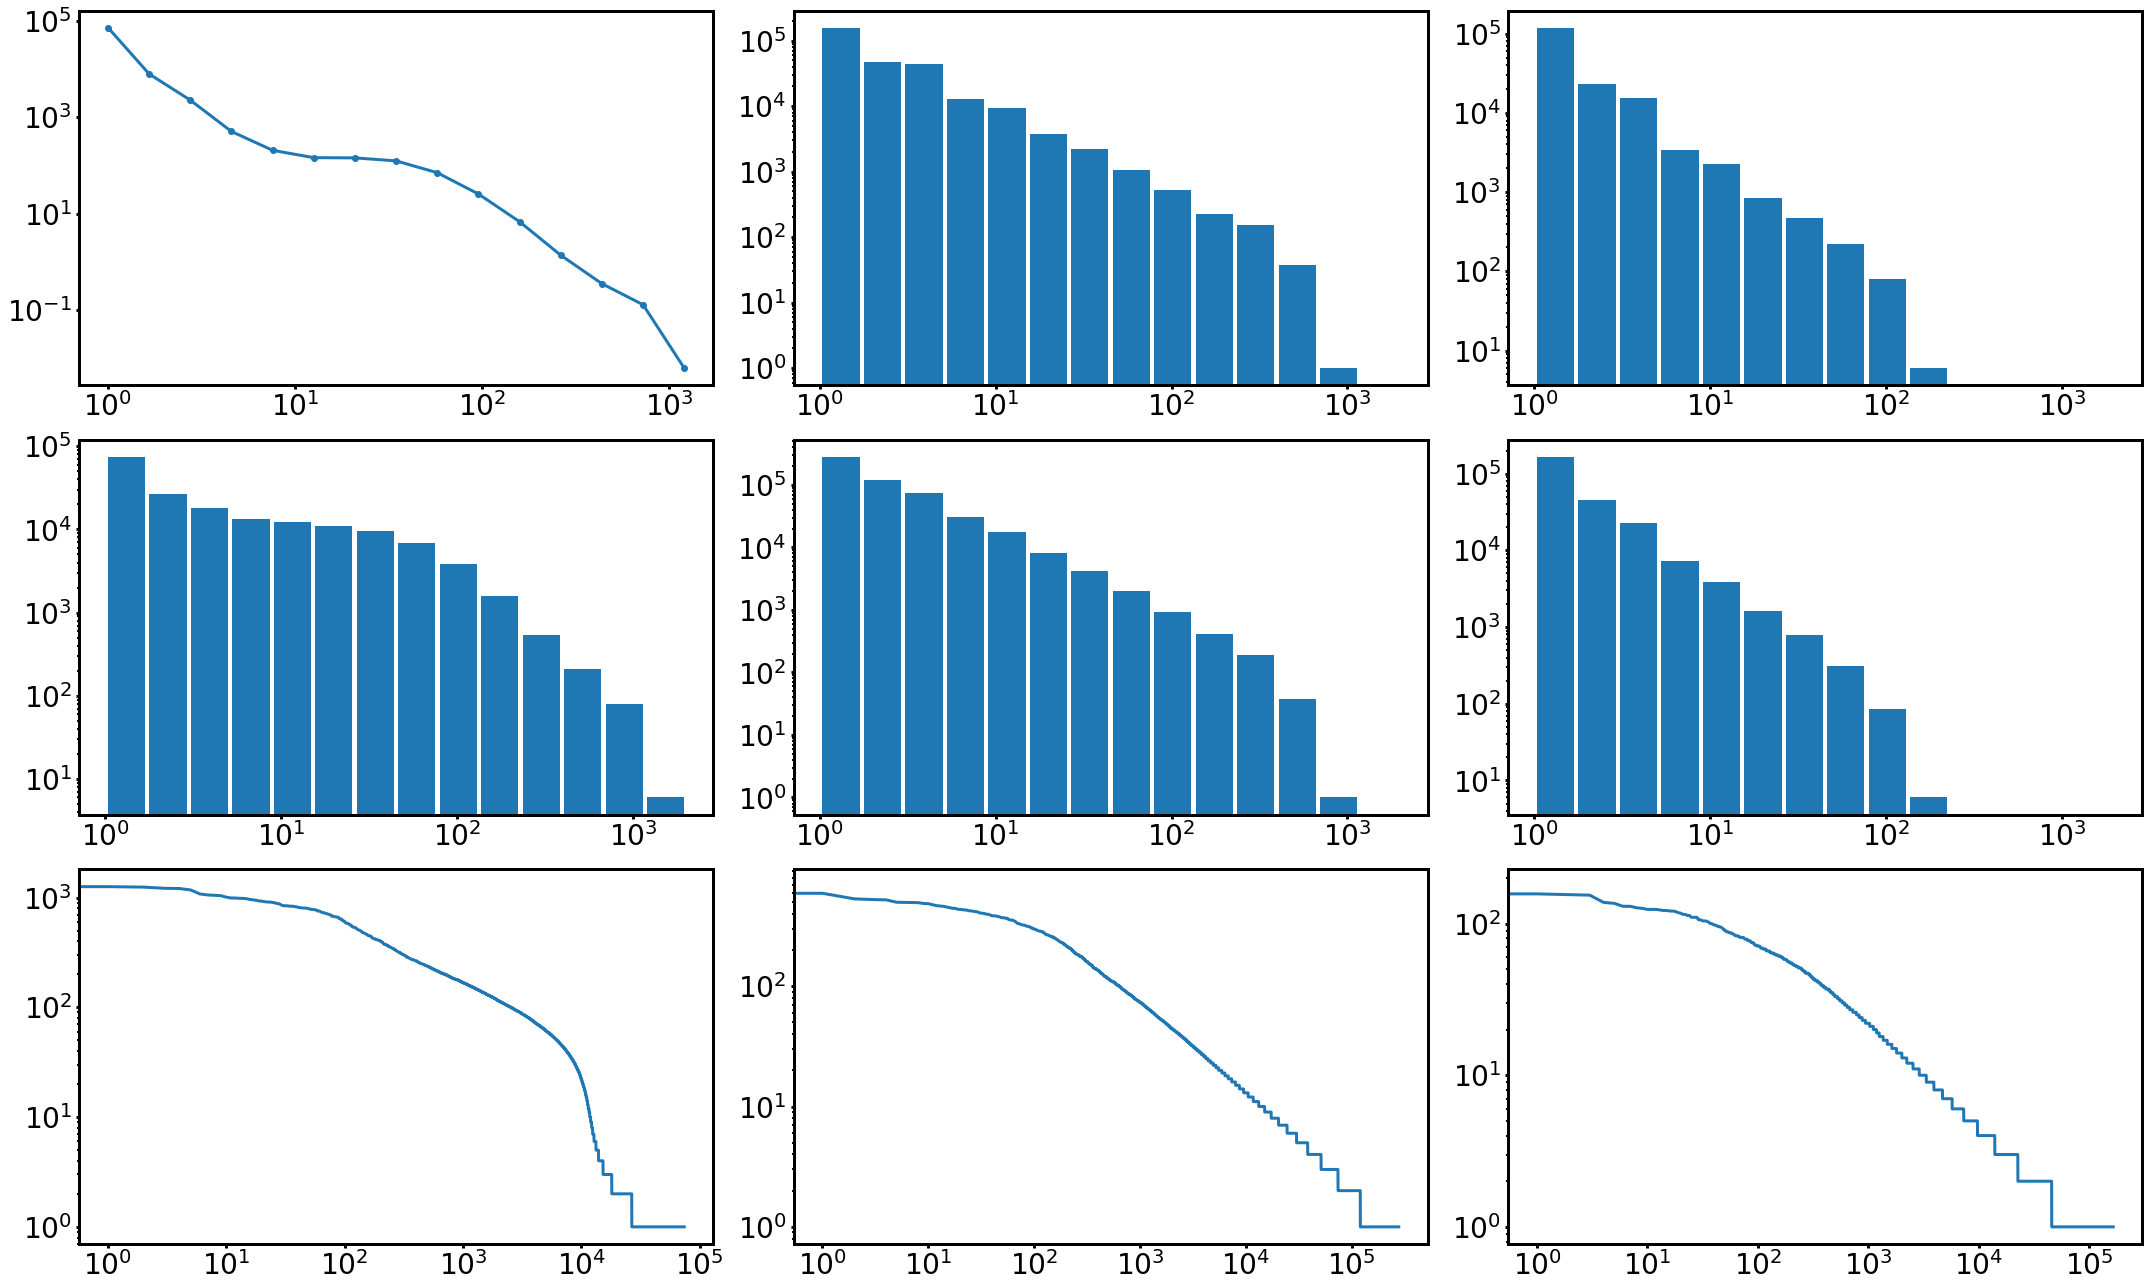

In [238]:
ncols = 3
nrows = 3
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes[0][0]
Y = all_comp_sizes_lst['BtwU']

# log-scaled bins
bins = np.logspace(0, np.log10(N), 16)
widths = (bins[1:] - bins[:-1])

# Calculate histogram
hist = np.histogram(Y, bins=bins)
# normalize by bin width
hist_norm = hist[0]/widths

# plot it!
#ax.bar(bins[:-1], hist_norm, 0.9*widths)
ax.plot(bins[:-1], hist_norm, 'o-')
ax.set_xscale('log')
ax.set_yscale('log')


ax = axes[0][1]
Y = all_comp_sizes_lst['DegU']
bins = np.logspace(0, np.log10(N), 15)
ax.hist(Y, bins=bins, rwidth=0.9)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[0][2]
Y = all_comp_sizes_lst['Ran']
bins = np.logspace(0, np.log10(N), 15)
ax.hist(Y, bins=bins, rwidth=0.9)
ax.set_xscale('log')
ax.set_yscale('log')


ax = axes[1][0]
Y = all_comp_sizes_lst['BtwU']
bins = np.logspace(0, np.log10(N), 15)
ax.hist(Y, bins=bins, rwidth=0.9, cumulative=-1)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[1][1]
Y = all_comp_sizes_lst['DegU']
bins = np.logspace(0, np.log10(N), 15)
ax.hist(Y, bins=bins, rwidth=0.9, cumulative=-1)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[1][2]
Y = all_comp_sizes_lst['Ran']
bins = np.logspace(0, np.log10(N), 15)
ax.hist(Y, bins=bins, rwidth=0.9, cumulative=-1)
ax.set_xscale('log')
ax.set_yscale('log')


ax = axes[2][0]
Y = sorted(all_comp_sizes_lst['BtwU'], reverse=True)
X = range(len(Y))
ax.plot(X, Y)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[2][1]
Y = sorted(all_comp_sizes_lst['DegU'], reverse=True)
X = range(len(Y))
ax.plot(X, Y)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[2][2]
Y = sorted(all_comp_sizes_lst['Ran'], reverse=True)
X = range(len(Y))
ax.plot(X, Y)
ax.set_xscale('log')
ax.set_yscale('log')

plt.tight_layout()
plt.show()